## Random Variables Exercises

In [1]:
library(downloader) 
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/femaleControlsPopulation.csv"
filename <- basename(url)
download(url, destfile=filename)
x <- unlist( read.csv(filename))

Warning message:
"package 'downloader' was built under R version 3.5.2"

In [2]:
head(x)

Bodyweight1 Bodyweight2 Bodyweight3 Bodyweight4 Bodyweight5 Bodyweight6 
      27.03       24.80       27.02       28.07       23.55       22.72

__What is the average of these weights?__

In [3]:
mean(x)

[1] 23.89338

__After setting the seed at 1, set.seed(1) take a random sample of size 5. What is the absolute value (use abs) of the difference between the average of the sample and the average of all the values?__

In [5]:
set.seed(1)
i <- sample(x, 5)
mean(i) - mean(x)

[1] 0.2706222

__After setting the seed at 5, set.seed(5) take a random sample of size 5. What is the absolute value of the difference between the average of the sample and the average of all the values?__

In [6]:
set.seed(5)
i <- sample(x, 5)
mean(i) - mean(x)

[1] -1.433378

## Null Distributions Exercises

In [7]:
library(downloader) 
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/femaleControlsPopulation.csv"
filename <- basename(url)
download(url, destfile=filename)
x <- unlist( read.csv(filename) )

__Set the seed at 1, then using a for-loop take a random sample of 5 mice 1,000 times. Save these averages. What proportion of these 1,000 averages are more than 1 gram away from the average of x ?__

[1] 0.498

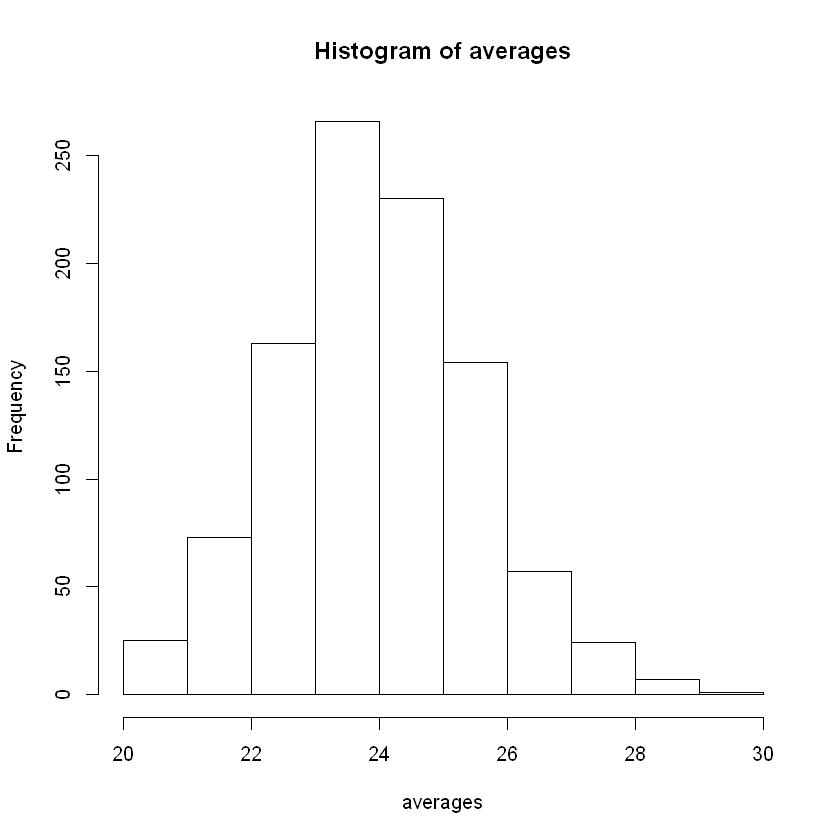

In [8]:
set.seed(1)
averages <- vector("numeric",1000)
for(i in 1:1000){
  X <- sample(x,5)
  averages[i] <- mean(X)
}
hist(averages) ##take a look
mean( abs( averages - mean(x) ) > 1)

__We are now going to increase the number of times we redo the sample from 1,000 to 10,000. Set the seed at 1, then using a for-loop take a random sample of 5 mice 10,000 times. Save these averages. What proportion of these 10,000 averages are more than 1 gram away from the average of x ?__

[1] 0.4976

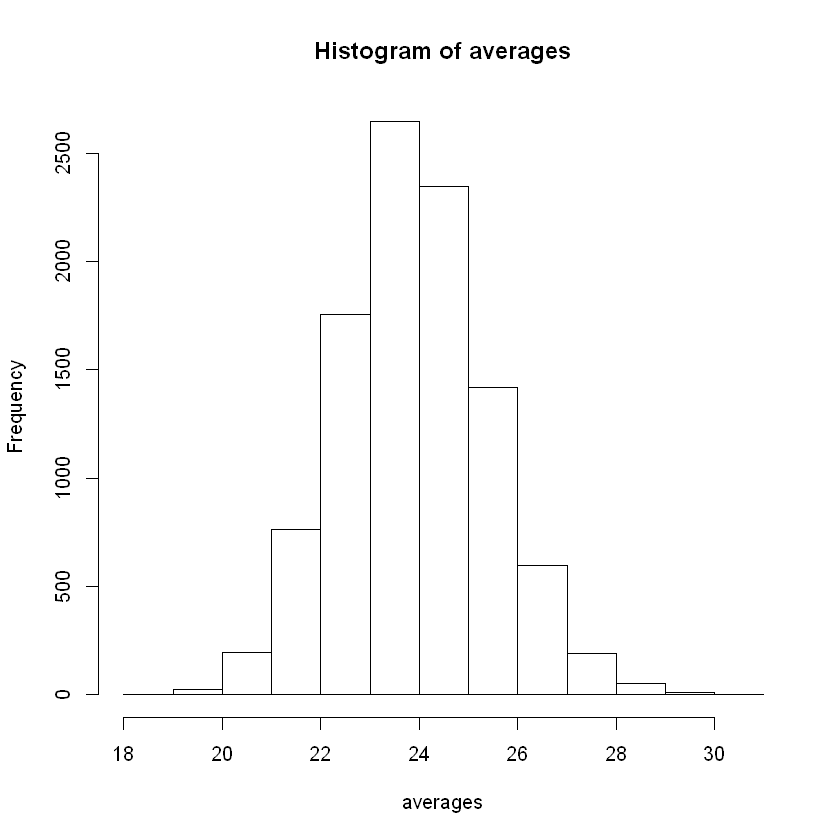

In [9]:
set.seed(1)
averages <- vector("numeric",10000)
for(i in 1:10000){
  X <- sample(x,5)
  averages[i] <- mean(X)
}
hist(averages) ##take a look
mean( abs( averages - mean(x) ) > 1)

__Note that the answers to 1 and 2 barely changed. This is expected. The way we think about the random value distributions is as the distribution of the list of values obtained if we repeated the experiment an infinite number of times. On a computer, we can't perform an infinite number of iterations so instead, for our examples, we consider 1,000 to be large enough, thus 10,000 is as well. Now if instead we change the sample size, then we change the random variable and thus its distribution.__

__Set the seed at 1, then using a for-loop take a random sample of 50 mice 1,000 times. Save these averages. What proportion of these 1,000 averages are more than 1 gram away from the average of x ?__

[1] 0.019

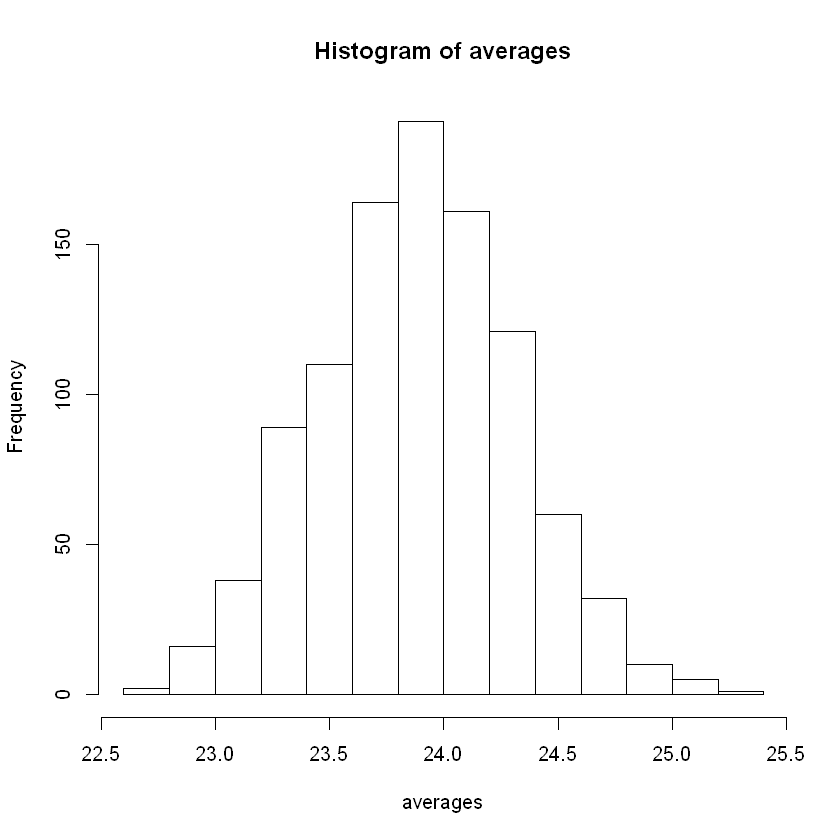

In [12]:
set.seed(1)
averages <- vector("numeric",1000)
for(i in 1:1000){
  X <- sample(x,50)
  averages[i] <- mean(X)
}
hist(averages) ##take a look
mean( abs( averages - mean(x) ) > 1)

## Probability Distributions Exercises

In [15]:
#install.packages("gapminder", repos = "http://cran.us.r-project.org")

In [16]:
library(gapminder)
data(gapminder)
head(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.5.2"

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


__In statistics, the empirical cumulative distribution function (or empirical cdf or empirical distribution function) is the function F(a) for any a, which tells you the proportion of the values which are less than or equal to a.__

We can compute F in two ways: the simplest way is to type mean(x <= a). This calculates the number of values in x which are less than or equal a, divided by the total number of values in x, in other words the proportion of values less than or equal to a.

The second way, which is a bit more complex for beginners, is to use the ecdf() function. This is a bit complicated because this is a function that doesn't return a value, but a function.

Let's continue, using the simpler, mean() function.

What is the proportion of countries in 1952 that have a life expectancy less than or equal to 40?

In [18]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  2.0.1     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [29]:
ex1 <- gapminder %>% filter(year == 1952)

In [34]:
nrow(ex1 %>% filter(lifeExp <=40))/nrow(ex1)

[1] 0.2887324

__What is the proportion of countries in 1952 that have a life expectancy between 40 and 60 years? Hint: this is the proportion that have a life expectancy less than or equal to 60 years, minus the proportion that have a life expectancy less than or equal to 40 years.__

In [35]:
x = ex1$lifeExp
mean(x <= 60) - mean(x <= 40)



[1] 0.4647887